In [1]:
from sympy import init_session
init_session()
from IPython.display import display

IPython console for SymPy 0.7.6 (Python 2.7.8-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [2]:
from sympy.matrices import *

In [5]:
A = Matrix([[1, 2, 3], [-3, 1, 4], [2, 5, -2]])

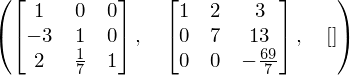

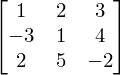

In [7]:
ALU=A.LUdecomposition()
display(ALU)
ALU[0]*ALU[1]

In [6]:
A = Matrix([[1, 1, 1],[0, 1, 1], [0, 0, 1]])

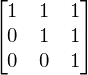

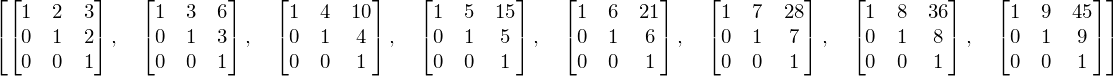

In [12]:
Ak=[]
for k in range(2,10):
    Ak.append(A**k)
display(A)
display(Ak)

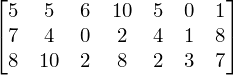

In [7]:
B = randMatrix(3,7,0,10)
display(B)

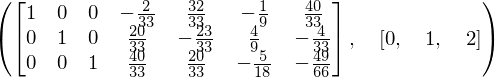

In [8]:
B.rref()

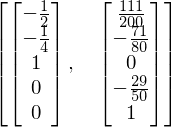

In [6]:
BNS=B.nullspace()
display(BNS)

In [8]:
D = Matrix([[2, 2, -2], [5, 1, -3], [1, 5, -3]])
print (D + eye(3))*(D - eye(3))*(-1)*(D**2 + eye(3))
print D*D

Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
Matrix([[12, -4, -4], [12, -4, -4], [24, -8, -8]])


In [9]:
print B.det(), C.det()

1 -2


In [10]:
M = Matrix([[12, -4, -4], [12, -4, -4], [24, -8, -8]])
print M.det()
print (M + eye(3)).det()

0
1


Hypothesis: If $A$ is a matrix with $\text{det}(A) = 0$, then $\text{det}(A + I) \neq 0$.

In [11]:
def eij(n, i, j):
    M = zeros(n)
    M[i-1, j-1] = 1
    return M

def exchange_row_ij(M, i, j):
    n = M.shape[0] # Number of rows in matrix M
    return (eye(n) + eij(n, i, j) + eij(n, j, i) - eij(n, i, i) - eij(n, j, j))*M

def mult_row(M, i, c):
    n = M.shape[0] # Number of rows in matrix M
    return (eye(n) + (c-1)*eij(n, i,i))*M

def ri_eq_ri_p_crj(M, i, j, c):
    n = M.shape[0]
    return (eye(n) + c*eij(n, i, j))*M
    

In [12]:
M = Matrix([[1, 2, 3, 4], [-2, 3, 1, 1], [5, -1, 3, 2]])

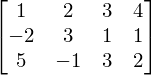

In [13]:
display(M)

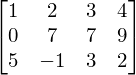

In [14]:
M1 = ri_eq_ri_p_crj(M, 2, 1, 2)
display(M1)

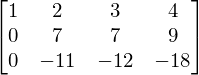

In [15]:
M2 = ri_eq_ri_p_crj(M1, 3, 1, -5)
display(M2)

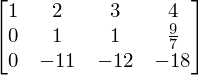

In [16]:
M3 = mult_row(M2, 2, S(1)/7)
display(M3)

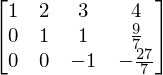

In [17]:
M4 = ri_eq_ri_p_crj(M3, 3, 2, 11)
display(M4)

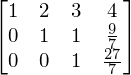

In [18]:
M5 = mult_row(M4, 3, -1)
display(M5)

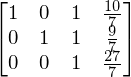

In [19]:
M6 = ri_eq_ri_p_crj(M5, 1, 2, -2)
display(M6)

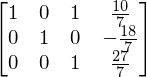

In [20]:
M7 = ri_eq_ri_p_crj(M6, 2, 3, -1)
display(M7)

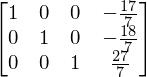

In [21]:
M8 = ri_eq_ri_p_crj(M7, 1, 3, -1)
display(M8)

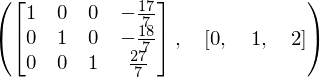

In [22]:
M.rref()

In [23]:
a,b,c,d,e,f = symbols('a b c d e f')
P = Matrix([[2, 3],[1, 2],[2, 5]])
Q = Matrix([[a, b, c], [d, e, f]])

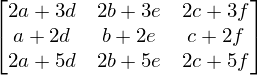

In [24]:
PQ = P*Q
display(PQ)

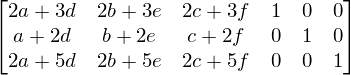

In [25]:
PQI3 = PQ.row_join(eye(3))
display(PQI3)

In [26]:
PQrref = PQI3.rref()

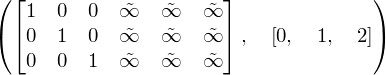

In [27]:
simplify(PQrref)

In [4]:
M = Matrix([[1, 2, 3], [-2, 0, 4], [3, -1, 1]])

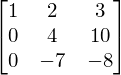

In [6]:
A = Matrix([[1, 0, 0], [2, 1, 0], [-3, 0, 1]])
display(A*M)

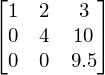

In [7]:
B = Matrix([[1, 0, 0], [0, 1, 0], [0, 7/4, 1]])
display(B*A*M)

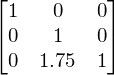

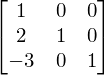

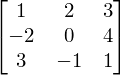

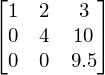

In [11]:
display(B,A,M)
display(B*A*M)

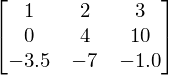

In [12]:
display(A*B*M)

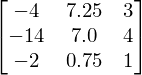

In [13]:
display(M*A*B)

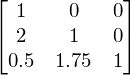

In [18]:
display(B*A)

In [24]:
A = Matrix([[1,1,-3,0], [1,2,1,4], [1,-1,0,2]])

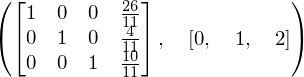

In [20]:
A.rref()

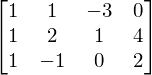

In [21]:
display(A)

In [25]:
A.col_del(3)

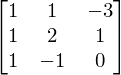

In [26]:
display(A)

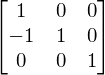

In [27]:
E21 = Matrix([[1,0,0], [-1,1,0],[0,0,1]])
display(E21)

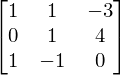

In [28]:
display(E21*A)

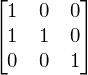

In [29]:
display(E21.inv())

In [2]:
from sympy.physics.vector import ReferenceFrame,curl,divergence,gradient,scalar_potential

In [3]:
R = ReferenceFrame('R')

In [43]:
field = 2*R[0]*R[1]*R.x + (R[0]**2 + 2*R[1]*R[2])*R.y + R[1]**2*R.z

In [45]:
curl(field,R)

In [47]:
divergence(field,R)

In [49]:
scalar_potential(field,R)

In [62]:
a = symbols('a')
f = a*R[0]*R[1] + a*R[0]**2 * R[1] + R[1]**3

In [63]:
divergence(gradient(f,R),R)

In [88]:
l, m = symbols('l m')
solns=solve([2*x - 2*l*x - m, 2*y - 2*l*y - m, 2*z + l - 2*m, x**2 + y**2 - z, x + y + 2*z - 18], x, y, z, l, m)

In [95]:
s1=solns[0][0]

In [105]:
real_solns=[(solns[n][0],solns[n][1],solns[n][2]) for n in range(len(solns)) if solns[n][0].is_real]

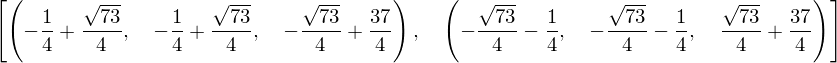

In [115]:
real_solns

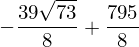

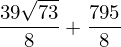

In [116]:
for soln in real_solns:
    display(simplify(f.subs(zip((x,y,z),soln))))
    display(simplify(f.subs(zip((x,y,z),soln))).n())

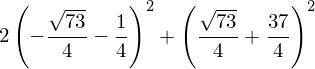

In [108]:
f.subs(zip((x,y,z),real_solns[1]))    

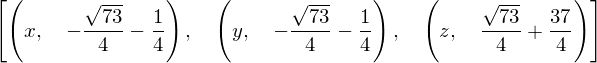

In [109]:
zip((x,y,z),real_solns[1])

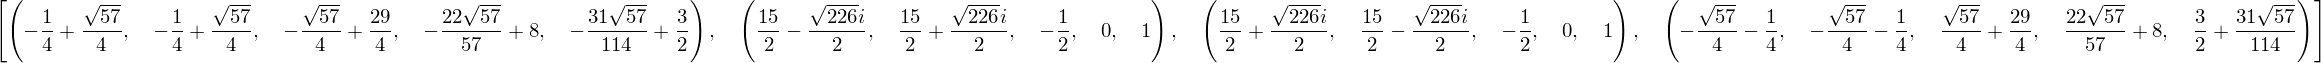

In [9]:
x, y, z, l, m = symbols('x y z l m')
solns = solve([2*x - l - 2*x*m, 2*y - l - 2*y*m, 2*z - 2*l + m, x + y + 2*z - 14, x**2 + y**2 - z], x,y,z,l,m)
display(solns)

In [10]:
for soln in solns:
    print((soln[0]**2 + soln[1]**2 + soln[2]**2).n())

34.1193915633258
-0.25 + 0.e-18*I
-0.25 + 0.e-18*I
92.6306084366742


In [29]:
def Qnr(p1, p2):
    q, r = div(p1, p2, x)
    print(q, r)
    print(p1, expand(p2*q+r))

In [30]:
Qnr(x**2 + 5*x + 4, x + 3)

(x + 2, -2)
(x**2 + 5*x + 4, x**2 + 5*x + 4)


In [31]:
Qnr(x**2 - x - 6, x + 1)

(x - 2, -4)
(x**2 - x - 6, x**2 - x - 6)


In [32]:
Qnr(15*x**2 + 19*x - 4, 3*x + 8)

(5*x - 7, 52)
(15*x**2 + 19*x - 4, 15*x**2 + 19*x - 4)


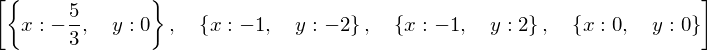

In [14]:
f = 2*x**3 + x*y**2 + 5*x**2 + y**2
solve([diff(f,x), diff(f,y)])

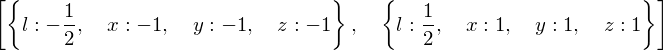

In [16]:
l = symbols('l')
solve([1-2*l*x, 2 - 4*l*y, 3-6*l*z, x**2 + 2*y**2 + 3*z**2 - 6])